In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("online_shoppers_intention.csv")

cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region',
                    'TrafficType', 'VisitorType', 'Weekend']

num_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

categorical = data[cat_cols]
numerical = data[num_cols + ['Revenue']]




In [58]:
scaler = MinMaxScaler()

numerical_normalized = numerical.copy()

categorical_one_hot = categorical.astype(str)
categorical_one_hot = pd.get_dummies(categorical_one_hot).join(data['Revenue']) #onehot encode, join revenue after to avoid one_hot encoding class column
numerical_normalized[num_cols] = pd.DataFrame(scaler.fit_transform(numerical_normalized[num_cols])) #normalize numericals

newdata = categorical_one_hot.join(numerical_normalized[num_cols])

In [59]:
#newdata.to_csv("test.csv", index=False)

In [66]:
def makeFreqGraph(df, col):
    # df (pd.Dataframe) -> dataset
    # col (str) -> column to make graph of
    if df[col].dtype == 'float64': #if float make a histogram to capture generic trend
        plt.hist(df[col])
    elif df[col].dtype == 'bool':
        df[col].value_counts().plot(kind='bar')
    else: #otherwise plot exact bars
        df = df.groupby(by=[col]).size().to_frame('count').reset_index()
        plt.bar(df[col], df['count'])
    plt.title("Frequencies of " + col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

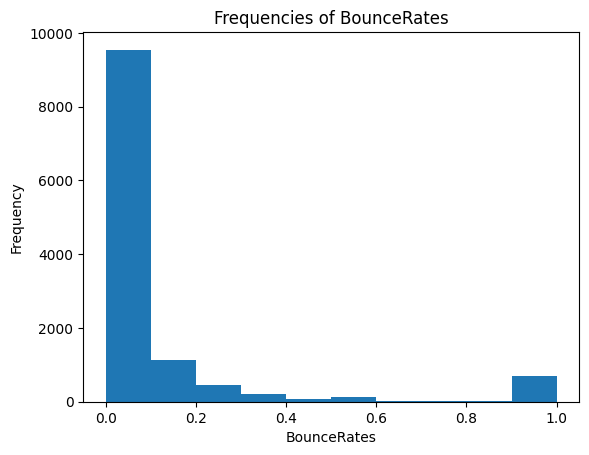

In [67]:
makeFreqGraph(newdata, "BounceRates")

In [62]:
print(categorical.describe()) #uncleaned data


       OperatingSystems       Browser        Region   TrafficType
count      12330.000000  12330.000000  12330.000000  12330.000000
mean           2.124006      2.357097      3.147364      4.069586
std            0.911325      1.717277      2.401591      4.025169
min            1.000000      1.000000      1.000000      1.000000
25%            2.000000      2.000000      1.000000      2.000000
50%            2.000000      2.000000      3.000000      2.000000
75%            3.000000      2.000000      4.000000      4.000000
max            8.000000     13.000000      9.000000     20.000000


In [63]:
print(numerical.describe()) #uncleaned data


       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000